In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from matplotlib.colors import ListedColormap
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 12.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
pd.options.display.max_rows=50
import re
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
def find_sheet_name(target_text,sheet_names):
    '''Return a list of sheet names containing a specific string'''
    return [name for name in sheet_names if target_text.lower() in name.lower()]
def find_column_name(target,columns):
    return [name for name in columns if target.lower() in name.lower()]

def month_diff(b,a):
    '''month differnece between two pandas datetime objects'''
    return (b.month - a.month + (b.year - a.year)*12)

def pq_lookup(date):
    '''retun period, quarter given a date (year,month,day)'''
    #3 month index to period quarter
    quarter_map={1:(1,1),2:(1,2),3:(2,3),4:(2,4),5:(3,1),6:(3,2),7:(4,3),8:(4,4),9:(5,1),10:(5,2),11:(6,3),12:(6,4)}
    qnum=1+int(month_diff(date,pd.datetime(2016,4,1))/3)
    p,q=quarter_map[qnum]
    return p,q

def cleanUp(sentence):
    sentence=sentence.replace('succesfully','successfully')#ahh misspelling!
    sentence=sentence.replace('Centres','Centers')#ahh misspelling!
    sentence=sentence.replace('(','').replace(')','')
    sentence=re.sub("sex workers", "sex workers", sentence, flags=re.I)
    sentence=re.sub("SWs", "sex workers", sentence, flags=re.I)
    sentence=sentence.replace('&','and').replace('tested positive','newly diagnosed').replace('-','')
    sentence=' '.join(sentence.split()) #clean up extra whitespaces
    return sentence

stopwords=['number','of','-','by','the','who','for','(SR)','an']
def clean_line(sentence):
    return ' '.join([word for word in sentence.lower().split() if word not in stopwords])

def save_dict_as_json(filename, mapping):
    '''Save dict as json object'''
    with open(filename, 'w') as outfile:
        json.dump(mapping, outfile, indent=4, sort_keys=True, separators=(',', ':'))

def load_dict_from_json(filepath):
    '''given file path to json mapping return a dict'''
    with open(filepath) as data_file:    
        return json.load(data_file)

In [3]:
xlsx_obj=pd.ExcelFile('/Users/attiladobi/Downloads/20161108 _ SW BL mapping V1+LC.xlsx')

In [4]:
sheetname=find_sheet_name('programme',xlsx_obj.sheet_names)
XL=xlsx_obj.parse(sheetname=sheetname,skiprows=2, header=0, usecols=range(1,50), skip_footer=0)[sheetname[0]]
XL=XL.rename(columns= {XL.columns[0]:'ME', XL.columns[1]:'ME_Name'}).dropna(subset=['ME'])
XL=XL.replace(nan,0).replace('x',0)

<h1> build a lookup for each BL code </h1>

In [5]:
XL.columns=XL.columns.astype(str) #replace with type string

In [6]:
XL

,ME,ME_Name,301,302,303,304,305,306,307,308,...,350,351,352,353,354,355,356,361,362,369
1,Indicator Ref.,Indicator Description,Participate in and support the SANAC Sex Work ...,Residential (non-accredited) 2 day meeting,Sisonke: National Coordinator,Sisonke: Deputy National Coordinator,Sisonke: provincial Coordinator,Sisonke: Outreach workers,Planning and administration - Small SRs,Sisonke travel,...,General / Workshop Facilitator,Helpline counsellor,Call centre management,Operational costs of call centre,5 day non-accredited training (per person),Training Facilitator,Flights and car hire,Management Support for sex work sub-recipients,Planning and administration - Medium SRs,TRANSITION\nSW Transition SRs - 6-month extens...
3,A1,A1: Number of sex workers reached with HIV pre...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A2,A2: Number of sex workers who received one or ...,0,0,0,0,0.5,0.6,0,0.5,...,0,0,0,0,0,0,0,0,0,0
5,E2,E2: Number of SWs attending creative space wor...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,B1,B1: Number of Sex Workers that have received a...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,C1,C1: Number of SWs screened for Sexually Trans...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,C2a,C2a: Number of SWs with a positive STI symptom...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,C2b,C2b: Number of SWs with a positive STI symptom...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,D1,D1: Number of SWs screened for TB,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,D2,D2: Number of SWs successfully referred for TB...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
blMAP={k:XL[k][1:].values.astype(float) for k in XL.columns[2:]} #.astype(str) save BL code as a string (some have a/b)
blMAP.update({'ME':XL['ME'][1:].values})
#save
np.save('blMAP_dict.npy',blMAP)

In [8]:
[(i,val) for i,val in XL['ME'][1:].iteritems()]

[(3, u'A1'),
 (4, u'A2'),
 (5, u'E2'),
 (6, u'B1'),
 (7, u'C1'),
 (8, u'C2a'),
 (9, u'C2b'),
 (10, u'D1'),
 (11, u'D2'),
 (12, u'E1'),
 (13, u'E3'),
 (14, u'E4'),
 (15, u'F1'),
 (16, u'F2'),
 (17, u'F3'),
 (18, u'G1'),
 (19, u'G2a'),
 (20, u'G2b'),
 (21, u'B2'),
 (22, u'B3'),
 (23, u'B4a'),
 (24, u'B4b'),
 (25, u'B5'),
 (26, u'B6'),
 (27, u'B7'),
 (28, u'B8a'),
 (29, u'B8b')]

<h3> Map (BL,ME) to fraction of budget </h3>

In [26]:
#blmeMAP={'(%s, %s)' % (bl, me): XL[bl][i] for bl in XL.columns[2:] for i,me in XL['ME'][1:].iteritems()}
blmeMAP = {bl: {me: XL[bl][i] for i,me in XL['ME'][1:].iteritems()} for bl in XL.columns[2:]}
np.save('blmeMAP_dict.npy',blmeMAP)
save_dict_as_json('blmeMAP.json',blmeMAP)

In [71]:
set([subkey for key in blmeMAP.itervalues() for subkey in key])

{u'A1',
 u'A2',
 u'B1',
 u'B2',
 u'B3',
 u'B4a',
 u'B4b',
 u'B5',
 u'B6',
 u'B7',
 u'B8a',
 u'B8b',
 u'C1',
 u'C2a',
 u'C2b',
 u'D1',
 u'D2',
 u'E1',
 u'E2',
 u'E3',
 u'E4',
 u'F1',
 u'F2',
 u'F3',
 u'G1',
 u'G2a',
 u'G2b'}

In [25]:
#given an Indicator name (ME), SR and date. We find all of corresponding BL items and spening
#returning a list of BL:money
blmeMAP['309']['D2']

0.02

In [37]:
def str2tuple(tstr):
    return tuple(tstr[1:-1].split(','))

<h1> Visualize the mapping </h1>

In [27]:
result=XL.drop(1).drop('ME_Name',axis=1).set_index('ME').replace(nan,0) #.drop([0,1,2,30,31,32,33,34])
result

cmap = mpl.colors.ListedColormap(['red','orange','yellow','green'])
bounds=[0,0.01,0.1,0.50,1.0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

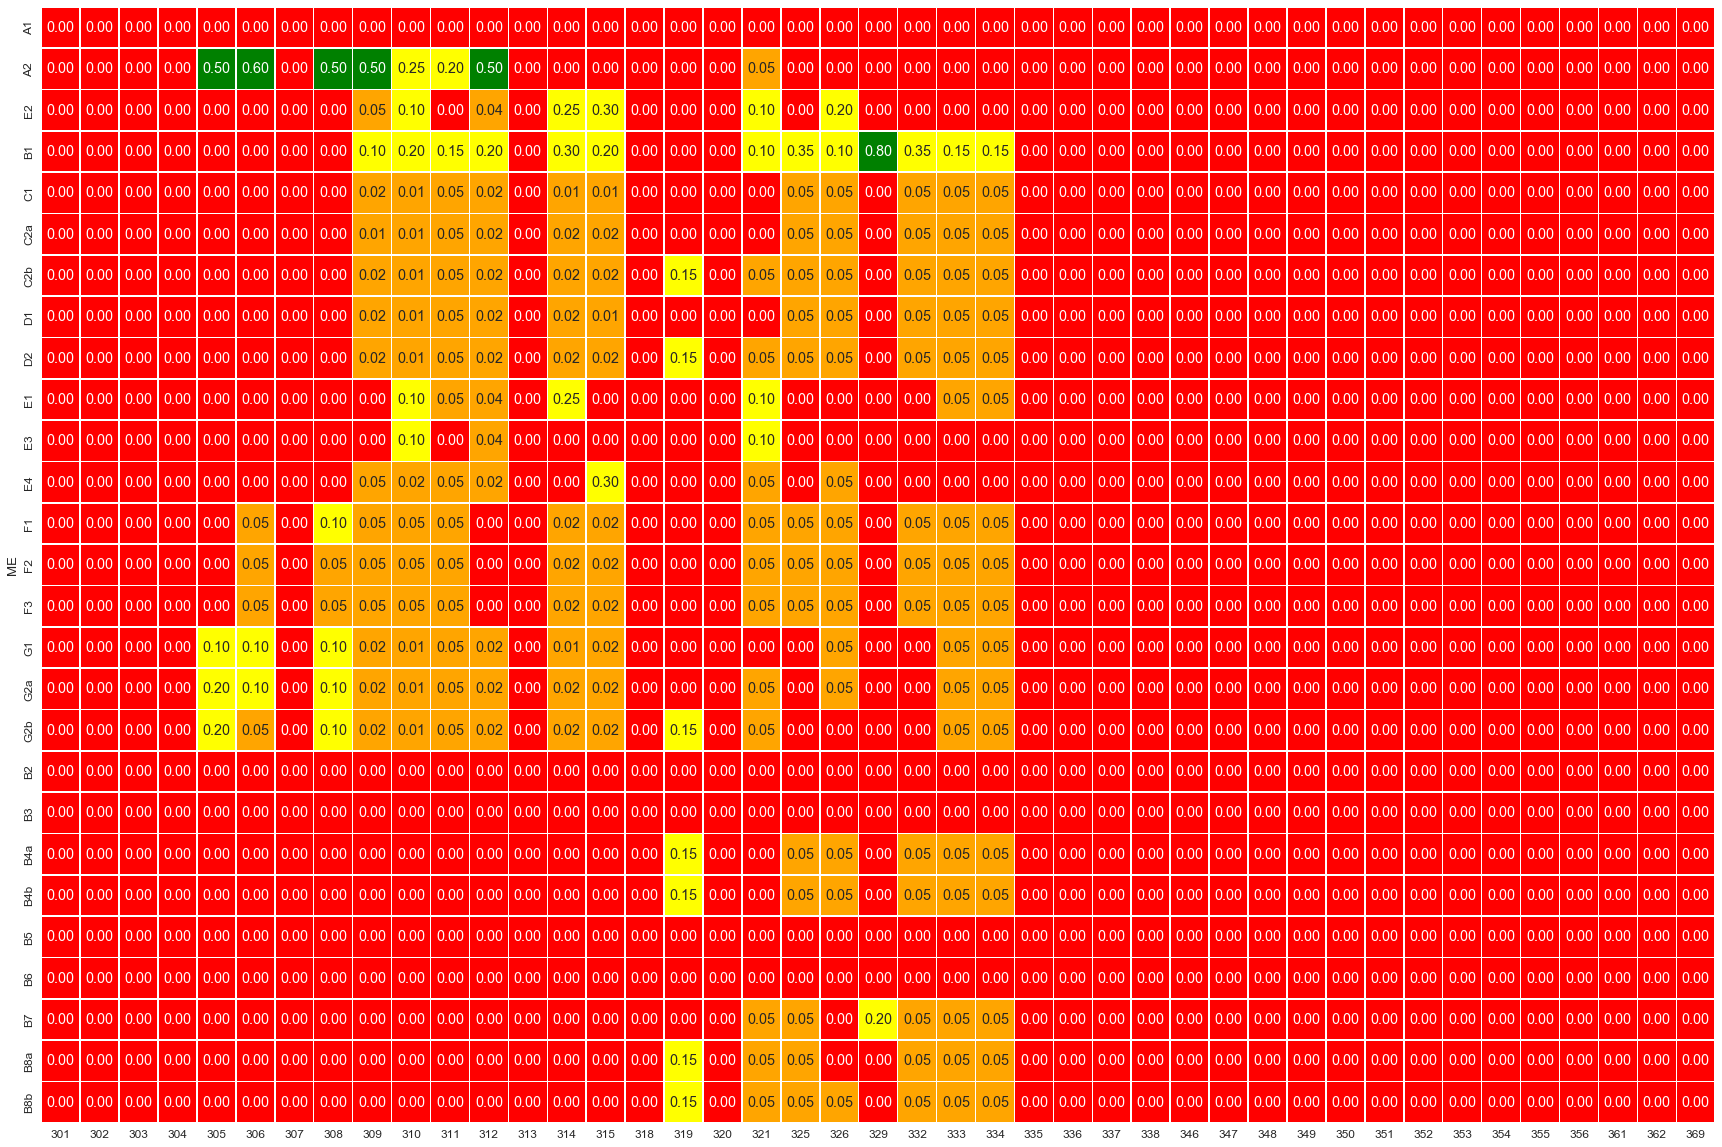

In [28]:
# result = XL.drop([0,1,2])
fig=figure()
fig.set_size_inches(30, 20)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
sns.heatmap(result, annot=True, fmt=".2f", cmap=cmap, norm=norm, label=None,\
             square=False,linewidths=0.5, cbar=False) #ListedColormap(['red','green', 'red']) #vmin=0,vmax=1.5
#plt.title('Ratio of Targets in SR Reports to Actual Targets \n Quarter: {:d}, Period: {:d}'.format(quarter,period))
plt.show()

<h1> Load lookup dictionary</h1>

In [2]:
MAP=np.load('blmeMAP_dict.npy').item()
ME=np.load('ME_dict.npy').item()

In [3]:
ME

{'A1': 'Number of sex workers reached with HIV prevention programs individual and/or smaller group level interventions',
 u'A2': u'Number of sex workers who received one or more services through outreach',
 u'B1': u'Number of sex workers that have received an HIV test during the reporting period and know their results',
 u'B2': u'Number of sex workers who tested HIV negative in the reporting period',
 u'B3': u'Number of newly diagnosed HIV positive sex workers',
 u'B4a': u'Number of newly diagnosed HIV positive sex workers referred for ART',
 u'B4b': u'Number of newly diagnosed HIV positive sex workers initiated on ART',
 u'B5': u'Number of sex workers with known HIV positive status',
 u'B6': u'Number of sex workers who refused HIV test',
 u'B7': u'Number of HIV negative sex workers receiving PrEP',
 u'B8a': u'Number of HIV positive sex workers referred for Adherence support',
 u'B8b': u'Number of HIV positive sex workers successfully referred for Adherence support',
 u'C1': u'Number o

In [5]:
(319,'C2b') in MAP.keys()

True

In [31]:
BLs=list(set([key[0] for key in MAP.keys()]))
bl=BLs[1]
BLs

[301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 318,
 319,
 320,
 321,
 325,
 326,
 329,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 361,
 362,
 369]

In [21]:
[(bl, sum([val for key,val in MAP.iteritems() if key[0]==bl])) for bl in BLs]

[(301, 0),
 (302, 0),
 (303, 0),
 (304, 0),
 (305, 1.0),
 (306, 1.0),
 (307, 0),
 (308, 1.0),
 (309, 1.0),
 (310, 1.0),
 (311, 1.0),
 (312, 1.0),
 (313, 0),
 (314, 1.0),
 (315, 1.0),
 (318, 0),
 (319, 1.05),
 (320, 0),
 (321, 1.0000000000000002),
 (325, 1.0),
 (326, 1.0),
 (329, 1.0),
 (332, 1.0),
 (333, 1.0),
 (334, 1.0000000000000002),
 (335, 0),
 (336, 0),
 (337, 0),
 (338, 0),
 (346, 0),
 (347, 0),
 (348, 0),
 (349, 0),
 (350, 0),
 (351, 0),
 (352, 0),
 (353, 0),
 (354, 0),
 (355, 0),
 (356, 0),
 (361, 0),
 (362, 0),
 (369, 0)]

In [58]:
MEs=list(set([key[1] for key in MAP.keys()]))


In [59]:
{key:MAP[(319,key)]*300 for key in MEs}

{u'A1': 0,
 u'A2': 0,
 u'B1': 0,
 u'B2': 0,
 u'B3': 0,
 u'B4a': 45.0,
 u'B4b': 45.0,
 u'B5': 0,
 u'B6': 0,
 u'B7': 0,
 u'B8a': 45.0,
 u'B8b': 45.0,
 u'C1': 0,
 u'C2a': 0,
 u'C2b': 45.0,
 u'D1': 0,
 u'D2': 45.0,
 u'E1': 0,
 u'E2': 0,
 u'E3': 0,
 u'E4': 0,
 u'F1': 0,
 u'F2': 0,
 u'F3': 0,
 u'G1': 0,
 u'G2a': 0,
 u'G2b': 45.0}

In [ ]:
#[key for key in sorted(MAP.keys())]

In [6]:
int('127')

127